# Data Analysis

Text EDA and Analysis on News Headlines Data
(Feature Engineering + Exploratory Analysis + Topic Modelling + Bag of Words)
This kernal provides a walkthrough of text analysis of Reuter's Headlines published in 2017. It includes exploration, feature engineering, and visualization of headlines data as well as a detailed text-analysis of disaster related headlines of 2017.

Contents:
1. Dataset Preparation  
2. Feature Engineering  
    2.1 Statistical Features  
    2.2 Text Features  
3. Exploratory Analysis   
    3.1. Headline's Word Count Distribution over the year  
    3.2. Headline's Character Count Distribution over the year  
    3.3. Headline's Average Word Density Distribution over the year  
    3.4. Headline's Punctuation Count distribution over the year  
    3.5. Publish Date Parameters distribution - Month, Month-Date  
    3.6. Publish Date Parameters distribution - Week-Day, Hour  
    3.7. Week day vs Week end distribution  
    3.8. Sentiment over Time  
    3.9. Top Positive vs Top Negative Words Used in the headlines  
    3.10. Countries Visualization  

4. Bag of Words Analysis - Natural Disaster News  
    4.1 Top Words Usage  
    4.2 N-gram Analysis  
    4.3 Topic Models Analysis  

## 1. Dataset Preparation

Load the required package and data

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



from data_pipeline.reader import ContractNLIDataset, ContractNLIDoc
from data_pipeline.utils import get_span_by_start_end

os.chdir(r'C:\Users\Nguyen\PycharmProjects\master_thesis')

In [2]:
train_dataset = ContractNLIDataset(filepath="data/contractNLI/train.json")
dev_dataset = ContractNLIDataset(filepath="data/contractNLI/dev.json")
test_dataset = ContractNLIDataset(filepath="data/contractNLI/test.json")

train_all_ids = train_dataset.get_all_ids()
dev_all_ids = dev_dataset.get_all_ids()
test_all_ids = test_dataset.get_all_ids()

In [3]:
train_token_len = []
dev_token_len = []
test_token_len = []

train_sen_num = []
dev_sen_num = []
test_sen_num = []

train_para_num = []
dev_para_num = []
test_para_num = []


for _id in train_all_ids:
    text = train_dataset.get_document_text_by_id(_id)
    text = text.replace("\n", "\n\n")
    doc = ContractNLIDoc(text)
    train_token_len.append(len(doc))
    sen = doc._get_sentence_()
    train_sen_num.append(len(sen))
    para = doc._get_paragraph_()
    train_para_num.append(len(para))
    
for _id in dev_all_ids:
    text = dev_dataset.get_document_text_by_id(_id)
    text = text.replace("\n", "\n\n")
    doc = ContractNLIDoc(text)
    dev_token_len.append(len(doc))
    sen = doc._get_sentence_()
    dev_sen_num.append(len(sen))
    if "\n" in text:
        para = doc._get_paragraph_()
        dev_para_num.append(len(para))
    
for _id in test_all_ids:
    text = test_dataset.get_document_text_by_id(_id)
    text = text.replace("\n", "\n\n")
    doc = ContractNLIDoc(text)
    test_token_len.append(len(doc))
    sen = doc._get_sentence_()
    test_sen_num.append(len(sen))
    if "\n" in text:
        para = doc._get_paragraph_()
        test_para_num.append(len(para))

ValueError: Input vector needs to be bigger than window size.

In [4]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('dennlinger/roberta-cls-consec')
model = AutoModelForSequenceClassification.from_pretrained('dennlinger/roberta-cls-consec')

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at dennlinger/roberta-cls-consec were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 2. Feature Engineering 

### 2.1 Statistical Features

#### 2.1.1 Number of document per train/dev/test 

In [22]:
print("Number of document in train dataset: ", len(train_token_len))
print("Number of document in dev dataset: ", len(dev_token_len))
print("Number of document in test dataset: ", len(test_token_len))

Number of document in train dataset:  423
Number of document in dev dataset:  61
Number of document in test dataset:  123


#### 2.1.2 Number of tokens per document in train/dev/test

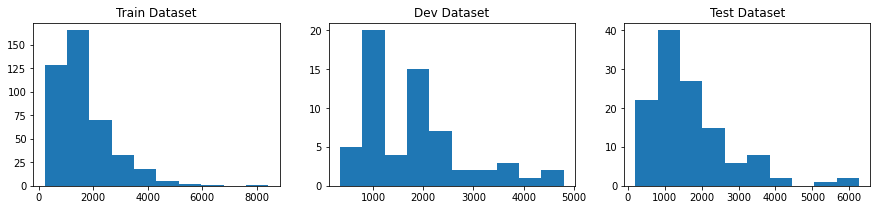

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))  
axes[0].hist(train_token_len)
axes[0].title.set_text('Train Dataset')
axes[1].hist(dev_token_len)
axes[1].title.set_text('Dev Dataset')
axes[2].hist(test_token_len)
axes[2].title.set_text('Test Dataset')

#### 2.1.3 Number of sentence per documentation

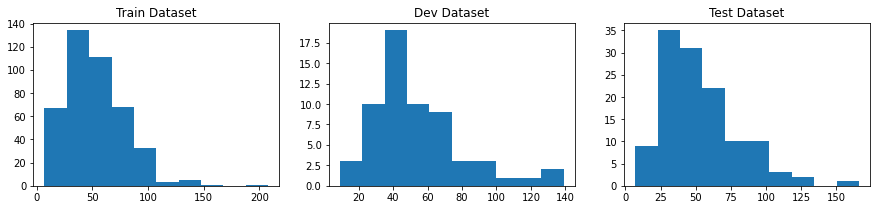

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))  
axes[0].hist(train_sen_num)
axes[0].title.set_text('Train Dataset')
axes[1].hist(dev_sen_num)
axes[1].title.set_text('Dev Dataset')
axes[2].hist(test_sen_num)
axes[2].title.set_text('Test Dataset')

#### 2.1.3 Number of sentence per documentation

#entailment/neutral/contradict, avg. #evidence sentences per train/dev/test

entailment/neutral/contradict

avg. evidence sentences per train/dev/test

avg. #evidence sentences per train/dev/test

### 2.2 Text Features

## 3. Exploratory Analysis

In [8]:

for _id in all_ids:
    annotations = train_dataset.get_document_annotations_by_id(_id)
    spans = train_dataset.get_document_span_by_id(_id)
    text = train_dataset.get_document_text_by_id(_id)

    for nda_id, values in annotations.items():
        if values["choice"] != "NotMentioned" and nda_id == 'nda-2':
            evidence = []
            for span_id in values["spans"]:
                start, end = spans[span_id]
                evidence.append(get_span_by_start_end(text, start, end ))
            evidence = "\n".join(evidence)
            print("DocId: ", id)
            print("Hypothesis: ", nda_id)
            print(evidence)
            print("\n\n\n")

DocId:  <built-in function id>
Hypothesis:  nda-2
“Confidential Information” means any Idea disclosed to Mentor, all data and information, know-how, business concepts, software, procedures, products, services, development projects, and programmes contained in such Idea and/or its description and any conclusions. 




DocId:  <built-in function id>
Hypothesis:  nda-2
Confidential Information includes, without limitation, non-public information relating to released or unreleased Disclosing Party software products, the marketing or promotion of any Disclosing Party product, Disclosing Party’s business policies or practices, financial information, technical information, computer systems, infrastructure designs, data, analysis, compilations, studies or other documentation and information received from others that Disclosing Party is obligated to treat as confidential. 




DocId:  <built-in function id>
Hypothesis:  nda-2
A. “Confidential Information” as used herein any and all confidential

DocId:  <built-in function id>
Hypothesis:  nda-2
Confidential Information includes, without limitation, information, know-how, specifications, materials, models, plans, discoveries, trade secrets (as such term is defined in the Uniform Trade Secrets Act in effect on the Effective Date), records, data, business, marketing, manufacturing and financial records, operations and strategies, invention plans, distribution channels, and technical and product information, customer data, product services, information of the Disclosing Party’s subsidiaries and entities under its control and other communications concerning the Transaction and/or the Disclosing Party’s business and operations, together with all portions of analyses, compilations, notes, studies and other documents prepared by or for the benefit of the Receiving Party which contain or otherwise reflect any of the foregoing. 




DocId:  <built-in function id>
Hypothesis:  nda-2
(a) The term “Evaluation Material” means information co